In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [83]:
data = pd.read_csv('iris.csv',header=None)

In [84]:
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [85]:
data.columns = ['Slength','Swidth','Plength','Pwidth','Species']

In [86]:
data.head()

,Slength,Swidth,Plength,Pwidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [87]:
data.shape

(150, 5)

In [88]:
data['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [89]:
data.describe()

,Slength,Swidth,Plength,Pwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


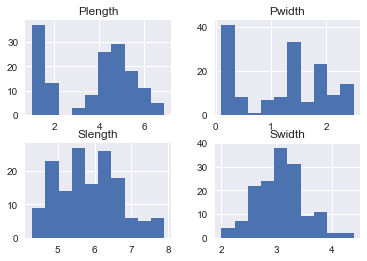

In [90]:
fig = plt.figure(figsize=(10,8))
data.hist()
plt.show()

In [91]:
import scipy.stats as stats

In [92]:
pvalue = stats.normaltest(data['Plength'])[1]

In [93]:
pvalue < 0.055

True

In [94]:
corr_mat = data.corr()

In [95]:
corr_mat

,Slength,Swidth,Plength,Pwidth
Slength,1.000000,-0.109369,0.871754,0.817954
Swidth,-0.109369,1.000000,-0.420516,-0.356544
Plength,0.871754,-0.420516,1.000000,0.962757
Pwidth,0.817954,-0.356544,0.962757,1.000000


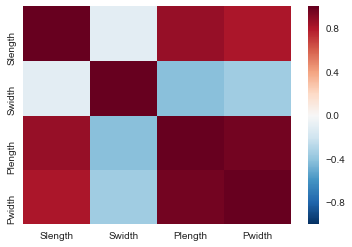

In [96]:
sns.heatmap(corr_mat)

In [97]:
from mpl_toolkits.mplot3d import Axes3D

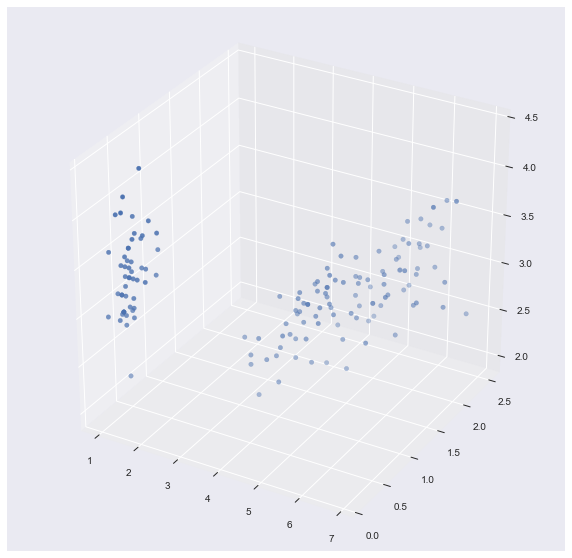

In [98]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(data['Plength'],data['Pwidth'],data['Swidth'])

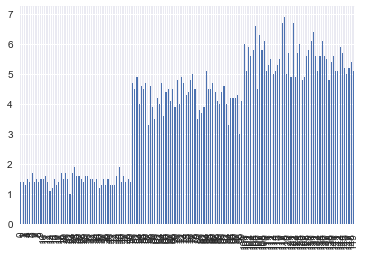

In [99]:
data['Plength'].plot(kind = 'bar')

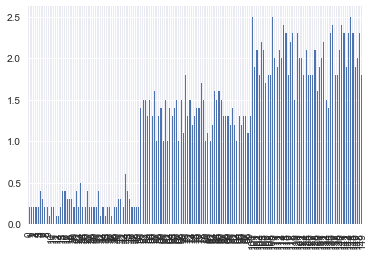

In [100]:
data['Pwidth'].plot(kind = 'bar')

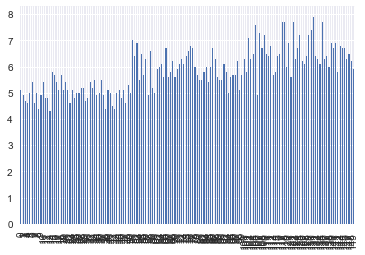

In [101]:
data['Slength'].plot(kind = 'bar')

In [102]:
from sklearn import linear_model

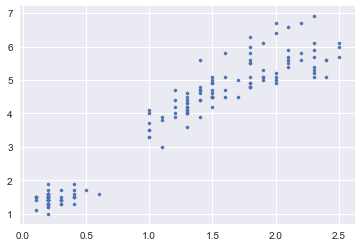

In [103]:

plt.scatter(data['Pwidth'],data['Plength'],10)

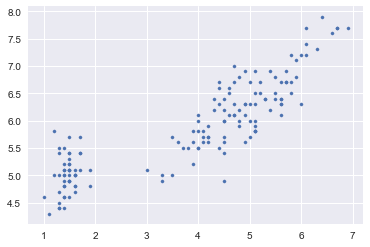

In [104]:
plt.scatter(data['Plength'],data['Slength'],10)

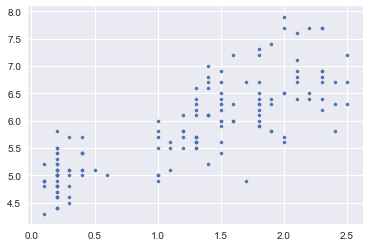

In [105]:
plt.scatter(data['Pwidth'],data['Slength'],10)

In [128]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [107]:
LE = LabelEncoder()
LE.fit(data['Species'].values)
data['Species'] = LE.transform(data['Species'].values)

In [125]:
X_train,X_test,y_train,y_test = train_test_split(data.iloc[:,0:4],data.iloc[:,4])

In [161]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [162]:
prediction = knn.predict(X_test)

In [163]:
accuracy_score(y_test,prediction)

1.0